<a href="https://colab.research.google.com/github/sattviksahai/CS583B_Recitation/blob/master/Recitation2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load MNIST dataset from Keras #

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Shape of x_train: {}'.format(x_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of x_test: {}'.format(x_test.shape))
print('Shape of x_test: {}'.format(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of x_test: (10000,)


# Display a few example images from the MNIST dataset #

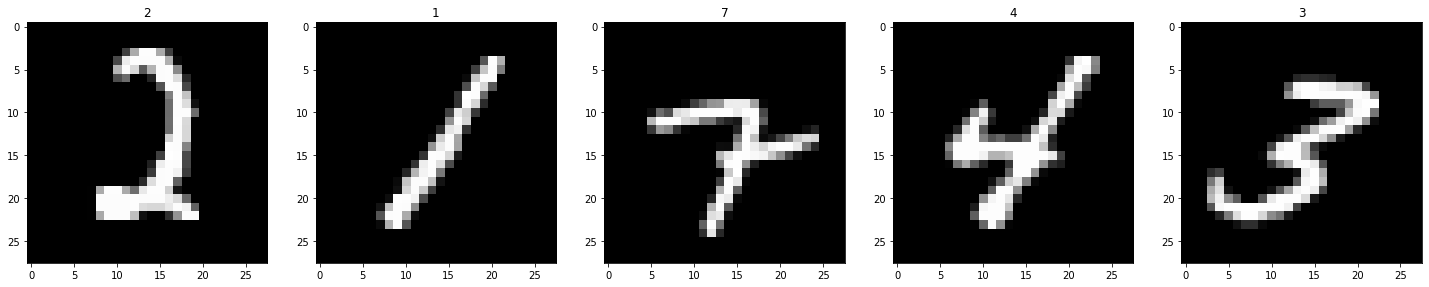

In [2]:
import matplotlib.pyplot as plt
import random

fig, axs = plt.subplots(1,5,figsize=(25,25))

for i in range(5):
  ind = random.randint(0,x_train.shape[0])
  axs[i].imshow(x_train[ind,:,:], cmap='gray')
  axs[i].set_title(y_train[ind])
plt.show()

# Convert to Vector #

In [3]:
x_train_vec = x_train.reshape(x_train.shape[0],-1)
x_test_vec = x_test.reshape(x_test.shape[0],-1)

print('Shape of x_train_vec: {}'.format(x_train_vec.shape))
print('Shape of x_test_vec: {}'.format(x_test_vec.shape))

Shape of x_train_vec: (60000, 784)
Shape of x_test_vec: (10000, 784)


In [4]:
import numpy as np

def to_one_hot(labels, dimension=10):
  result = np.zeros((len(labels), dimension))
  for i, lab in enumerate(labels):
    result[i, lab] = 1
  return result

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of one hot encoded y_train_vec: {}'.format(y_train_vec.shape))
print('Shape of one hot encoded y_test_vec: {}'.format(y_test_vec.shape))

Shape of one hot encoded y_train_vec: (60000, 10)
Shape of one hot encoded y_test_vec: (10000, 10)


# Create validation set #

In [5]:
rand_indices = np.random.permutation(x_train_vec.shape[0])
train_indices = rand_indices[:50000]
valid_indies = rand_indices[50000:]

x_valid_vec = x_train_vec[valid_indies, :]
y_valid_vec = y_train_vec[valid_indies, :]

x_train_vec = x_train_vec[train_indices,:]
y_train_vec = y_train_vec[train_indices,:]

print('Shape of x_valid_vec: {}'.format(x_valid_vec.shape))
print('Shape of y_valid_vec: {}'.format(y_valid_vec.shape))
print('Shape of x_train_vec: {}'.format(x_train_vec.shape))
print('Shape of y_train_vec: {}'.format(y_train_vec.shape))

Shape of x_valid_vec: (10000, 784)
Shape of y_valid_vec: (10000, 10)
Shape of x_train_vec: (50000, 784)
Shape of y_train_vec: (50000, 10)


# Define Softmax Model #

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(x_train_vec.shape[1],)))

# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Compile Model #

In [7]:
from keras import optimizers

model.compile(optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model #

In [8]:
history = model.fit(x_train_vec, y_train_vec, batch_size=128, epochs=50, validation_data=(x_valid_vec, y_valid_vec))

Epoch 1/50
391/391 [==============================] - 1s 3ms/step - loss: 50.5197 - accuracy: 0.4665 - val_loss: 16.3129 - val_accuracy: 0.7254
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 12.5731 - accuracy: 0.7763 - val_loss: 9.8608 - val_accuracy: 0.8190
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 8.8550 - accuracy: 0.8288 - val_loss: 7.8907 - val_accuracy: 0.8475
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 7.2730 - accuracy: 0.8473 - val_loss: 6.8884 - val_accuracy: 0.8597
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 6.3234 - accuracy: 0.8593 - val_loss: 6.2829 - val_accuracy: 0.8638
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 5.6463 - accuracy: 0.8671 - val_loss: 5.7833 - val_accuracy: 0.8690
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 5.1580 - accuracy: 0.8709 - val_loss: 5.4179 - val_accuracy: 0.8740
Epo

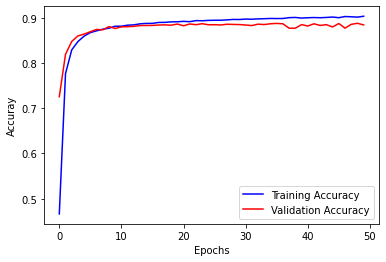

In [10]:
epochs = range(50)

train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuray')
plt.legend()
plt.show()

In [11]:
(loss, accuracy) = model.evaluate(x_test_vec, y_test_vec)

print('loss: {}'.format(loss))
print('accuracy: {}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 2.0038 - accuracy: 0.8856
loss: 2.0037684440612793
accuracy: 0.8855999708175659
